### Exploring Data
Plot distributions and generate pictures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

%matplotlib inline

#### Examine the most and least frequent samples

In [2]:
df = pd.read_csv('data/labels.csv')

In [3]:
dist = df.groupby('breed').count().rename(columns={'id':'freq'})

In [4]:
most_common = dist.sort_values(by='freq',ascending=False)[:5]
least_common = dist.sort_values(by='freq',ascending=True)[:5]

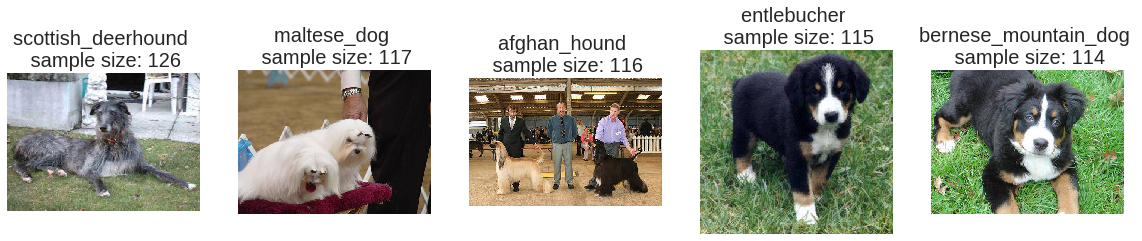

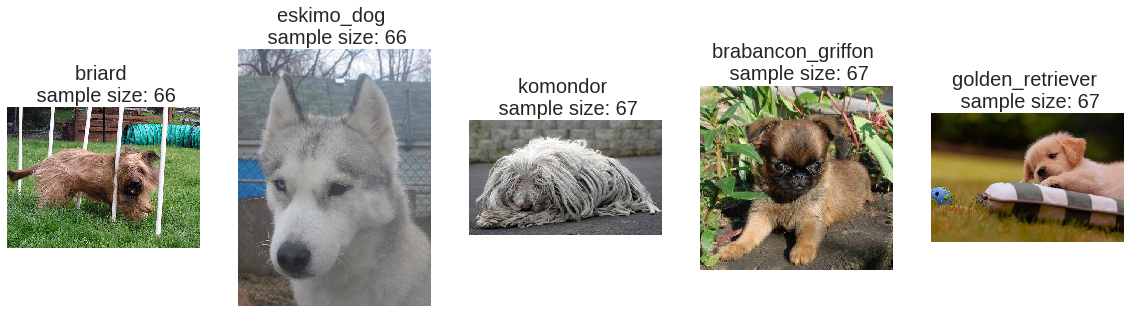

In [5]:
#Iterate over two distributional ends
for dist_end in [most_common, least_common]:
    fig = plt.figure(figsize=(20,20))
    for i, breed in enumerate(list(dist_end.index)):
        sample_size = dist[dist.index==breed]['freq'][0]
        #Randomly sample one picture from each breed
        breed_id = df[df['breed']==breed]['id'].iloc[np.random.randint(0,sample_size)]
        image = Image.open('data/train/'+breed_id+'.jpg','r')
        ax = fig.add_subplot(1,5,i+1)
        plt.imshow(image)
        #Hide grid
        ax.grid(False)
        #Hide x and y axes
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #Set title with the breed name and sample size
        ax.set_title('{} \n sample size: {}'.format(breed,dist_end[dist_end.index==breed]['freq'][0]),fontsize=20)

#### One Breed One Picture
for human learning

In [ ]:
all_breeds = df['breed'].unique()
len(all_breeds)

In [ ]:
fig = plt.figure(figsize=(50,50))
for breed in all_breeds:
    sample_size = dist[dist.index==breed]['freq'][0]
    #Randomly sample one picture from each breed
    breed_id = df[df['breed']==breed]['id'].iloc[np.random.randint(0,sample_size)]
    with Image.open('data/train/'+breed_id+'.jpg','r') as image:
        plt.imshow(image)
    ax = fig.add_subplot(111)
    #Hide grid
    ax.grid(False)
    #Hide x and y axes
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    #Set title with the breed name and sample size
    ax.set_title(breed,fontsize=300)
    plt.savefig('data/dogs/'+breed)
    plt.cla()
plt.clf()